In [1]:
from matplotlib import pyplot as plt
import numpy as np

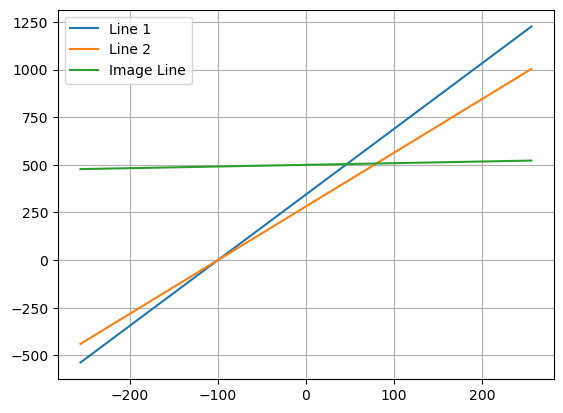

In [63]:
(x_0, y_0) = (-100, -300) # source_point
ap_0 = (-10, 10)
ap_1 = (10, 10)
aper_len = np.abs(ap_0[0] - ap_1[0])

line_1_slope = (ap_0[1] - y_0)/(ap_0[0] - x_0)
line_1_intercept = -1*line_1_slope*x_0
line_2_slope = (ap_1[1] - y_0)/(ap_1[0] - x_0)
line_2_intercept = -1*line_2_slope*x_0

image_line_angle = np.pi * 5/180
image_line_slope = np.tan(image_line_angle)
image_line_intercept = 500


# X, Y = np.meshgrid(np.meshgrid([i for i in range(0, 30)], [i for i in range(0, 30)]))

X = np.linspace(-2*128, 2*128, 257)
line_1_y = line_1_slope*X + line_1_intercept
line_2_y = line_2_slope*X + line_2_intercept
image_line_y = image_line_slope*X + image_line_intercept

plt.plot(X, line_1_y, label='Line 1')
plt.plot(X, line_2_y, label='Line 2')
plt.plot(X, image_line_y, label='Image Line')
plt.legend()
plt.grid()
plt.show()

In [99]:
# using led grid measurements for image plane tilt

tilt_angle = np.pi/2 - np.arccos((123.6/123.12)/(4*32))
tilt_angle * 180 /np.pi

0.4493730044876982

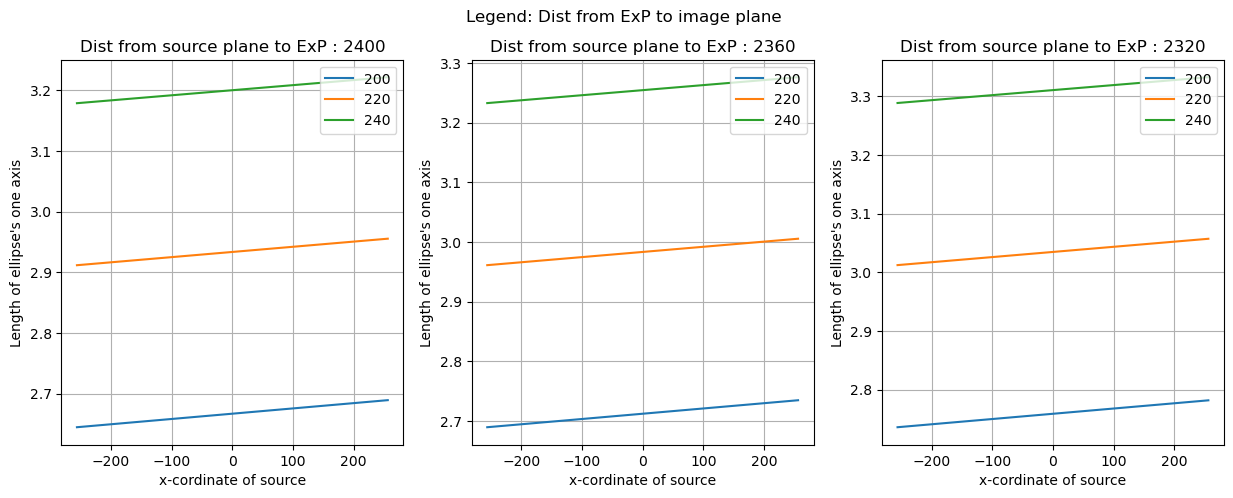

In [100]:
tilt_angle = np.pi/2 - np.arccos((123.6/123.12)/(4*32))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# scy = -20
aperture_diam = 32
for i, scy in enumerate([-2400, -2360, -2320]):
    for z in [200, 220, 240]:
        dist = []
        for scx in np.linspace(-2*128, 2*128, 257):
            (x_0, y_0) = (scx, scy) # source_point
            ap_0 = (-1*aperture_diam/2, 0)
            ap_1 = (ap_0[0] + aperture_diam, 0)
            aper_len = np.abs(ap_0[0] - ap_1[0])

            line_1_slope = (ap_0[1] - y_0)/(ap_0[0] - x_0 + 1e-8)
            line_1_intercept = -1*line_1_slope*x_0
            line_2_slope = (ap_1[1] - y_0)/(ap_1[0] - x_0 + 1e-8)
            line_2_intercept = -1*line_2_slope*x_0

            image_line_angle = tilt_angle
            image_line_slope = np.tan(image_line_angle)
            image_line_intercept = z

            intx_line1_image = (image_line_intercept - line_1_intercept)/(line_1_slope - image_line_slope)
            inty_line1_image = line_1_slope*intx_line1_image + line_1_intercept

            intx_line2_image = (image_line_intercept - line_2_intercept)/(line_2_slope - image_line_slope)
            inty_line2_image = line_2_slope*intx_line2_image + line_2_intercept

            dist.append(np.sqrt((intx_line1_image - intx_line2_image)**2 + (inty_line1_image - inty_line2_image)**2))

        axs[i].plot(np.linspace(-2*128, 2*128, 257), dist, label=f'{z}')
    axs[i].grid()
    axs[i].legend()
    axs[i].set_xlabel('x-cordinate of source')
    axs[i].set_ylabel("Length of ellipse's one axis")
    axs[i].set_title(f'Dist from source plane to ExP : {np.abs(scy)}')

plt.suptitle('Legend: Dist from ExP to image plane')
plt.show()